In [1]:
import numpy as np
import matplotlib.pyplot as pt
import scipy as ci
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
import numpy.linalg as la
warnings.filterwarnings('ignore')
%matplotlib inline

<font size=5> Problem 1<font>


Now instantiating the particle physics experiment.


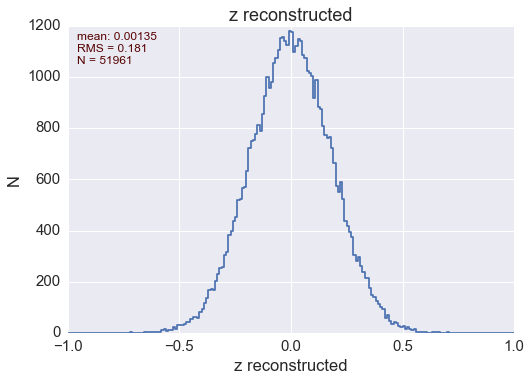

In [2]:
## apply variaitons first, and using the formulas in lecture notes to 
## get z_decay_recon.
sns.set(font_scale=1.5)
import week09_histogramObject as hb
import week09_particledetectorObject as ParticleDetectorClassDefinition
detector = ParticleDetectorClassDefinition.ParticleDetector()     
detector.z_target_to_chamber_1=61

histo1 = hb.histo("z reconstructed", 200,-1, 1.) 
histo1.hsetlabels("z reconstructed","N")

for i in range(0, 100000):
    detector.generate_one_kaon_decay()
    
    detector.x_hits_chamber_1_recon = detector.x_hits_chamber_1 + \
    np.random.normal(0., 0.2e-3,2)
    detector.y_hits_chamber_1_recon = detector.y_hits_chamber_1 + \
    np.random.normal(0., 0.2e-3,2)
    detector.x_hits_chamber_2_recon = detector.x_hits_chamber_2 + \
    np.random.normal(0., 0.2e-3,2)
    detector.y_hits_chamber_2_recon = detector.y_hits_chamber_2 + \
    np.random.normal(0., 0.2e-3,2)
    
    if detector.trigger_is_satisfied:

        x_A1=detector.x_hits_chamber_1_recon[0]
        y_A1=detector.y_hits_chamber_1_recon[0]
        x_A2=detector.x_hits_chamber_2_recon[0] 
        y_A2=detector.y_hits_chamber_2_recon[0]
        x_B1=detector.x_hits_chamber_1_recon[1]
        y_B1=detector.y_hits_chamber_1_recon[1]
        x_B2=detector.x_hits_chamber_2_recon[1] 
        y_B2=detector.y_hits_chamber_2_recon[1]
        z_1=61
        z_2=71
        
        z_X=((x_A1-x_B1)/(x_B2-x_A2+x_A1-x_B1))*(z_2-z_1)+z_1
        z_Y=((y_A1-y_B1)/(y_B2-y_A2+y_A1-y_B1))*(z_2-z_1)+z_1
        theta_X=((x_A2-x_B2)-(x_A1-x_B1))/(z_2-z_1)
        theta_Y=((y_A2-y_B2)-(y_A1-y_B1))/(z_2-z_1)
        
        z=(theta_X**2*z_X+theta_Y**2*z_Y)/(theta_X**2+theta_Y**2)

        detector.z_decay_recon=z
        histo1.hfill(detector.z_decay_recon-detector.z_decay)
        
histo1.hprint()
pt.show()

<font size=5> Problem 2<font>

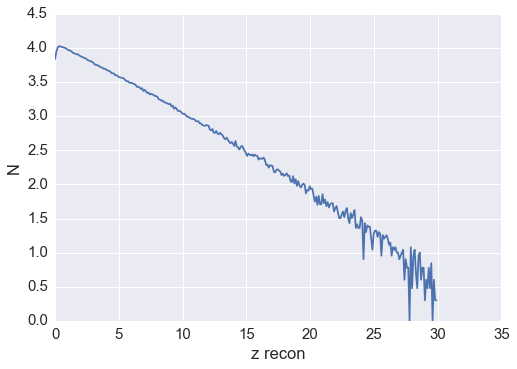

In [6]:
## GG's plot
in_binpop = np.array([0] * 300)
in_data_file = open("/Users/pacifist/Desktop/PHYS 199/python_scripts/week11_homework2.dat", "rb")
gg = np.load(in_data_file)

x=np.linspace(0,30,len(gg))
pt.plot(x,np.log10(gg))
pt.xlim(0,35);
pt.xlabel('z recon')
pt.ylabel('N')
pt.show()

In [32]:
### trying different gg_time and normalization factor to find 
# smallest chi^2 value.

Trial=[]
sns.set(font_scale=1.5)  

t=np.arange(1.16e-10,1.26e-10, 0.01e-10)

for j in t:
    histo2 = hb.histo("z accepted", 300, 0., 30.00)

    my_time=8.954e-11
    gg_time=j
    
    for i in range(0, int(100000)):
        detector.tau_kaon = my_time
        detector.z_target_to_chamber_1=61
        detector.generate_one_kaon_decay()

        
        ### 
        chamber_resolution=0.2e-3
        detector.x_hits_chamber_1_recon[0] = detector.x_hits_chamber_1_recon[0] + \
        np.random.normal(0., chamber_resolution)
        detector.x_hits_chamber_1_recon[1] = detector.x_hits_chamber_1_recon[1] + \
        np.random.normal(0., chamber_resolution)

        detector.y_hits_chamber_1_recon[0] = detector.y_hits_chamber_1_recon[0] + \
        np.random.normal(0., chamber_resolution)
        detector.y_hits_chamber_1_recon[1] = detector.y_hits_chamber_1_recon[1] + \
        np.random.normal(0., chamber_resolution)

        detector.x_hits_chamber_1_recon[0] = detector.x_hits_chamber_1_recon[0] + \
        np.random.normal(0., chamber_resolution)
        detector.x_hits_chamber_1_recon[1] = detector.x_hits_chamber_1_recon[1] + \
        np.random.normal(0., chamber_resolution)

        detector.y_hits_chamber_1_recon[0] = detector.y_hits_chamber_1_recon[0] + \
        np.random.normal(0., chamber_resolution)
        detector.y_hits_chamber_1_recon[1] = detector.y_hits_chamber_1_recon[1] + \
        np.random.normal(0., chamber_resolution)

        detector.x_hits_chamber_2_recon[0] = detector.x_hits_chamber_2_recon[0] + \
        np.random.normal(0., chamber_resolution)
        detector.x_hits_chamber_2_recon[1] = detector.x_hits_chamber_2_recon[1] + \
        np.random.normal(0., chamber_resolution)

        detector.y_hits_chamber_2_recon[0] = detector.y_hits_chamber_2_recon[0] + \
        np.random.normal(0., chamber_resolution)
        detector.y_hits_chamber_2_recon[1] = detector.y_hits_chamber_2_recon[1] + \
        np.random.normal(0., chamber_resolution)

        detector.x_hits_chamber_2_recon[0] = detector.x_hits_chamber_2_recon[0] + \
        np.random.normal(0., chamber_resolution)
        detector.x_hits_chamber_2_recon[1] = detector.x_hits_chamber_2_recon[1] + \
        np.random.normal(0., chamber_resolution)

        detector.y_hits_chamber_2_recon[0] = detector.y_hits_chamber_2_recon[0] + \
        np.random.normal(0., chamber_resolution)
        detector.y_hits_chamber_2_recon[1] = detector.y_hits_chamber_2_recon[1] + \
        np.random.normal(0., chamber_resolution)

        ###
        
        x_A1=detector.x_hits_chamber_1_recon[0]
        y_A1=detector.y_hits_chamber_1_recon[0]
        x_A2=detector.x_hits_chamber_2_recon[0] 
        y_A2=detector.y_hits_chamber_2_recon[0]
        x_B1=detector.x_hits_chamber_1_recon[1]
        y_B1=detector.y_hits_chamber_1_recon[1]
        x_B2=detector.x_hits_chamber_2_recon[1] 
        y_B2=detector.y_hits_chamber_2_recon[1]
        z_1=61
        z_2=71
        z_X=((x_A1-x_B1)/(x_B2-x_A2+x_A1-x_B1))*(z_2-z_1)+z_1
        z_Y=((y_A1-y_B1)/(y_B2-y_A2+y_A1-y_B1))*(z_2-z_1)+z_1
        theta_X=((x_A2-x_B2)-(x_A1-x_B1))/(z_2-z_1)
        theta_Y=((y_A2-y_B2)-(y_A1-y_B1))/(z_2-z_1)
        z=(theta_X**2*z_X+theta_Y**2*z_Y)/(theta_X**2+theta_Y**2) # recon z

        detector.z_decay_recon=z
        if detector.trigger_is_satisfied:
            histo2.hfill(detector.z_decay_recon)

    mine=histo2.binpop ## accepted decay z

    Chi=[]
    for i in range(1,10000):
        c=299792458
        dgg=gg_time*c*detector.kaon_gamma
        dmy=my_time*c*detector.kaon_gamma
        scale=0.1*i*np.exp(-x*(1/dgg-1/dmy))

        ggscale=gg/scale
        tmp=[]
        for k in range(0,len(scale)):
            if mine[k]!=0 and ggscale[k]!=0:
                tmp.append((mine[k]-ggscale[k])**2/mine[k])
                
        chi=sum(tmp)
        Chi.append(chi)
    Trial.append(min(Chi))
    print(min(Chi))

329.87832021
311.136000725
294.912525163
286.620248066
332.609561363
268.08928854
270.470813134
319.775329606
317.24588061
331.076976177
369.341549466


In [33]:
## So the best Tau is at about t=1.21e-10 s. 

In [35]:
## To find Chi: using the best Tau first.
sns.set(font_scale=1.5)  

histo1 = hb.histo("z all", 300, 0., 30.00)
histo2 = hb.histo("z accepted", 300, 0., 30.00)
histo3 = hb.histo("test", 300, 0, 30.00)


my_time=8.954e-11
gg_time=1.21e-10

for i in range(0, int(100000)):
    
    detector.tau_kaon = my_time
    detector.z_target_to_chamber_1=61
    detector.generate_one_kaon_decay()
    
    detector.x_hits_chamber_1_recon = detector.x_hits_chamber_1 + \
    np.random.normal(0., 0.2e-3,2)
    detector.y_hits_chamber_1_recon = detector.y_hits_chamber_1 + \
    np.random.normal(0., 0.2e-3,2)
    detector.x_hits_chamber_2_recon = detector.x_hits_chamber_2 + \
    np.random.normal(0., 0.2e-3,2)
    detector.y_hits_chamber_2_recon = detector.y_hits_chamber_2 + \
    np.random.normal(0., 0.2e-3,2)
    x_A1=detector.x_hits_chamber_1_recon[0]
    y_A1=detector.y_hits_chamber_1_recon[0]
    x_A2=detector.x_hits_chamber_2_recon[0] 
    y_A2=detector.y_hits_chamber_2_recon[0]
    x_B1=detector.x_hits_chamber_1_recon[1]
    y_B1=detector.y_hits_chamber_1_recon[1]
    x_B2=detector.x_hits_chamber_2_recon[1] 
    y_B2=detector.y_hits_chamber_2_recon[1]
    z_1=61
    z_2=71
    z_X=((x_A1-x_B1)/(x_B2-x_A2+x_A1-x_B1))*(z_2-z_1)+z_1
    z_Y=((y_A1-y_B1)/(y_B2-y_A2+y_A1-y_B1))*(z_2-z_1)+z_1
    theta_X=((x_A2-x_B2)-(x_A1-x_B1))/(z_2-z_1)
    theta_Y=((y_A2-y_B2)-(y_A1-y_B1))/(z_2-z_1)
    z=(theta_X**2*z_X+theta_Y**2*z_Y)/(theta_X**2+theta_Y**2) # recon z

    detector.z_decay_recon=z

    if detector.trigger_is_satisfied:

        histo2.hfill(detector.z_decay_recon)
        
mine=histo2.binpop ## accepted decay z

238.689697483
best N is at N=7.4


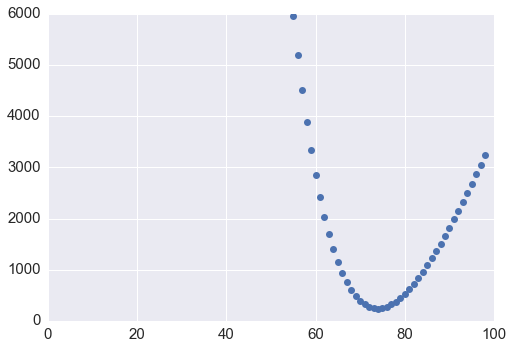

In [41]:
Chi=[]
for i in range(1,100):
    c=299792458
    dgg=gg_time*c*detector.kaon_gamma
    dmy=my_time*c*detector.kaon_gamma
    # scale=np.mean(gg[1])/np.mean(mine[2:5])*np.exp(-x*(1/dgg-1/dmy))
    scale=0.1*i*np.exp(-x*(1/dgg-1/dmy))

    ggscale=gg/scale
    tmp=[]
    for j in range(0,len(scale)):
        if mine[j]!=0 and ggscale[j]!=0:
            tmp.append((mine[j]-ggscale[j])**2/mine[j])
    chi=sum(tmp)
    Chi.append(chi)
pt.plot(Chi,'o')
pt.ylim(0,6000)
print(min(Chi))
print('best N is at N='+str(0.1*Chi.index(min(Chi))))

In [43]:
## Finally, using tau=1.21e-10 and N=7.4:

sns.set(font_scale=1.5)  

histo1 = hb.histo("z all", 300, 0., 30.00)
histo2 = hb.histo("z accepted", 300, 0., 30.00)
histo3 = hb.histo("test", 300, 0, 30.00)


my_time=8.954e-11
gg_time=1.21e-10

for i in range(0, int(7.4*100000)):
    
    detector.tau_kaon = my_time
    detector.z_target_to_chamber_1=61
    detector.generate_one_kaon_decay()
    
    detector.x_hits_chamber_1_recon = detector.x_hits_chamber_1 + \
    np.random.normal(0., 0.2e-3,2)
    detector.y_hits_chamber_1_recon = detector.y_hits_chamber_1 + \
    np.random.normal(0., 0.2e-3,2)
    detector.x_hits_chamber_2_recon = detector.x_hits_chamber_2 + \
    np.random.normal(0., 0.2e-3,2)
    detector.y_hits_chamber_2_recon = detector.y_hits_chamber_2 + \
    np.random.normal(0., 0.2e-3,2)
    x_A1=detector.x_hits_chamber_1_recon[0]
    y_A1=detector.y_hits_chamber_1_recon[0]
    x_A2=detector.x_hits_chamber_2_recon[0] 
    y_A2=detector.y_hits_chamber_2_recon[0]
    x_B1=detector.x_hits_chamber_1_recon[1]
    y_B1=detector.y_hits_chamber_1_recon[1]
    x_B2=detector.x_hits_chamber_2_recon[1] 
    y_B2=detector.y_hits_chamber_2_recon[1]
    z_1=61
    z_2=71
    z_X=((x_A1-x_B1)/(x_B2-x_A2+x_A1-x_B1))*(z_2-z_1)+z_1
    z_Y=((y_A1-y_B1)/(y_B2-y_A2+y_A1-y_B1))*(z_2-z_1)+z_1
    theta_X=((x_A2-x_B2)-(x_A1-x_B1))/(z_2-z_1)
    theta_Y=((y_A2-y_B2)-(y_A1-y_B1))/(z_2-z_1)
    z=(theta_X**2*z_X+theta_Y**2*z_Y)/(theta_X**2+theta_Y**2) # recon z

    detector.z_decay_recon=z

    if detector.trigger_is_satisfied:

        histo2.hfill(detector.z_decay_recon)
        
mine=histo2.binpop ## accepted decay z

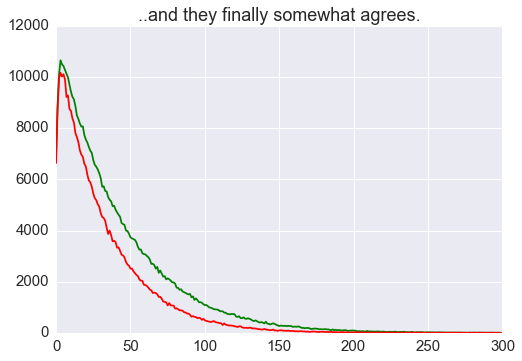

In [51]:
pt.plot(gg,color='green',label='gg_hist')
pt.plot(mine,color='red',label='my_hist')
pt.title('..and they finally somewhat agrees.')
pt.show()

In [61]:
## so the original lifetime is about 1.21e-10s, and the normalization
# constant is about 7.4 upward. The two plots above are not perfectly 
# agreeing due to the nonvanishing term (e^(-z(1/t1-1/t2))) where
# 1/t1-1/t2 may not be zero because the inaccuracy of lifetime estimated.

<font size=4>Time Took: Problem 1: 1hr. Problem 2: 72 hrs. Collaboration: Completed on my own. Reference: None. 